<a href="https://colab.research.google.com/github/Gilbert228/Talking-data-fraud-detection/blob/main/Talking_data_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/talking_data.csv')
data.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [ ]:
data.shape

(100000, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [ ]:
data.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [ ]:
data=data.drop(columns = ['attributed_time'])

In [ ]:
data.app.unique()

array([ 12,  25,  13,   3,   1,   9,   2,   6,  20,  14,  64,   7,  15,
        18,  11,   8,  23,  21,  56,  28,  36,  22,  26,  17,  27,  10,
        60,  58,  19,  32,  24,   4,  53, 125, 204,   5, 202,  70,  47,
        29,  55, 103,  35,  83, 208, 146, 161,  46,  62,  65, 110,  42,
       150, 266, 151, 148,  72, 310,  93,  94,  71,  43,  39, 170,  37,
        68,  54, 107, 398, 160,  30, 183, 315,  45, 121,  38,  82, 134,
        33, 233, 100,  44, 109,  59,  74,  61, 104,  66,  67, 273, 192,
        50, 118, 372,  48, 232, 165,  91, 123,  88, 538,  49,  16, 105,
       536, 216, 425, 117, 551,  99,  86, 101, 394,  78,  95, 181,  76,
        34, 124, 548, 108,  85, 145,  79,  97,  75,  52, 215,  84,  96,
        81, 139, 267,  80, 137, 119, 474, 158, 293, 122, 112, 149, 363,
       271,  31, 171,  87, 168, 176, 347, 163, 190, 486, 133, 302, 268,
       407, 116,  92, 115, 261])

In [ ]:
data.ip.nunique()

34857

In [ ]:
data.app.nunique()

161

In [ ]:
data.device.nunique()

100

In [ ]:
data.channel.nunique()

161

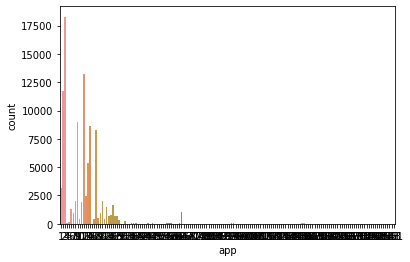

In [ ]:
sns.countplot(x=data.app)

In [ ]:
app_percent = (data.ip.value_counts() / data.shape[0]) * 100

In [ ]:
app_percent < 20

5348      True
5314      True
73487     True
73516     True
53454     True
          ... 
109522    True
140527    True
351154    True
195068    True
185961    True
Name: ip, Length: 34857, dtype: bool

In [ ]:
frequent_app=data.groupby('app').is_attributed.count()

In [ ]:
frequent_app=data.groupby('app').size().reset_index(name='count')

In [ ]:
frequent_app=frequent_app[frequent_app['count']> frequent_app['count'].quantile(0.80)]

In [ ]:
frequent_app=frequent_app.merge(data,on='app',how='inner')

In [ ]:
frequent_app.head(10)

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0
5,1,3135,104753,1,19,125,2017-11-07 09:44:02,0
6,1,3135,83366,1,17,153,2017-11-09 02:30:02,0
7,1,3135,46132,1,13,153,2017-11-08 02:47:43,0
8,1,3135,18350,1,10,137,2017-11-07 02:07:57,0
9,1,3135,73582,1,19,153,2017-11-07 15:26:59,0


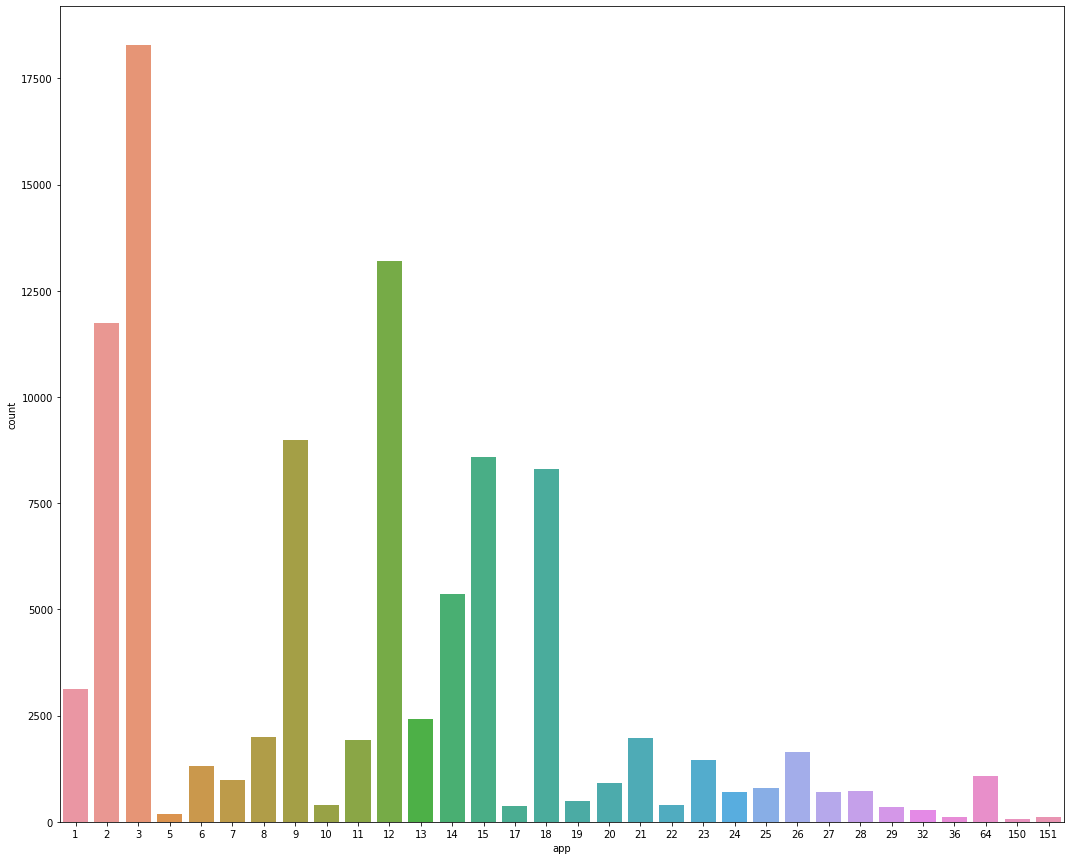

In [ ]:
plt.figure(figsize=(18,15))
sns.countplot(x='app',data=frequent_app)

In [ ]:
data.head()

,ip,app,device,os,channel,click_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,0
1,105560,25,1,17,259,2017-11-07 13:40:27,0
2,101424,12,1,19,212,2017-11-07 18:05:24,0
3,94584,13,1,13,477,2017-11-07 04:58:08,0
4,68413,12,1,1,178,2017-11-09 09:00:09,0


In [ ]:
data.drop('click_time',axis=1)

,ip,app,device,os,channel,is_attributed
0,87540,12,1,13,497,0
1,105560,25,1,17,259,0
2,101424,12,1,19,212,0
3,94584,13,1,13,477,0
4,68413,12,1,1,178,0
...,...,...,...,...,...,...
99995,124883,11,1,19,122,0
99996,85150,9,1,13,244,0
99997,18839,3,1,13,19,0
99998,114276,15,1,12,245,0


In [ ]:
y = data.loc[:,'is_attributed']

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_attributed, Length: 100000, dtype: int64

In [ ]:
data.drop('is_attributed',axis=1, inplace=True)

In [ ]:
import datetime as dt

data['time'] = pd.to_datetime(data['click_time'])

data['hours']  = pd.to_datetime(data['time']).dt.hour
data['minute']  = pd.to_datetime(data['time']).dt.minute
data['sec']  = pd.to_datetime(data['time']).dt.second

In [ ]:
data.head()

,ip,app,device,os,channel,click_time,time,hours,minute,sec
0,87540,12,1,13,497,2017-11-07 09:30:38,2017-11-07 09:30:38,9,30,38
1,105560,25,1,17,259,2017-11-07 13:40:27,2017-11-07 13:40:27,13,40,27
2,101424,12,1,19,212,2017-11-07 18:05:24,2017-11-07 18:05:24,18,5,24
3,94584,13,1,13,477,2017-11-07 04:58:08,2017-11-07 04:58:08,4,58,8
4,68413,12,1,1,178,2017-11-09 09:00:09,2017-11-09 09:00:09,9,0,9


In [ ]:
data['click_time']

0        2017-11-07 09:30:38
1        2017-11-07 13:40:27
2        2017-11-07 18:05:24
3        2017-11-07 04:58:08
4        2017-11-09 09:00:09
                ...         
99995    2017-11-09 13:25:41
99996    2017-11-07 11:25:43
99997    2017-11-08 11:38:42
99998    2017-11-08 17:55:21
99999    2017-11-07 14:32:27
Name: click_time, Length: 100000, dtype: object

In [ ]:
data.drop('click_time',axis=1, inplace=True)

data.drop('time',axis=1, inplace=True)

In [ ]:
x = data[:]

In [ ]:
x

,ip,app,device,os,channel,hours,minute,sec
0,87540,12,1,13,497,9,30,38
1,105560,25,1,17,259,13,40,27
2,101424,12,1,19,212,18,5,24
3,94584,13,1,13,477,4,58,8
4,68413,12,1,1,178,9,0,9
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,13,25,41
99996,85150,9,1,13,244,11,25,43
99997,18839,3,1,13,19,11,38,42
99998,114276,15,1,12,245,17,55,21


In [ ]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics
from sklearn import preprocessing

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=10)

In [ ]:
x_train.shape

(80000, 8)

In [ ]:
x_test.shape

(20000, 8)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
classi = XGBClassifier()
classi.fit(x_train,y_train)

XGBClassifier()

In [ ]:
x

,ip,app,device,os,channel,hours,minute,sec
0,87540,12,1,13,497,9,30,38
1,105560,25,1,17,259,13,40,27
2,101424,12,1,19,212,18,5,24
3,94584,13,1,13,477,4,58,8
4,68413,12,1,1,178,9,0,9
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,13,25,41
99996,85150,9,1,13,244,11,25,43
99997,18839,3,1,13,19,11,38,42
99998,114276,15,1,12,245,17,55,21


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_attributed, Length: 100000, dtype: int64

In [ ]:
test_pred=classi.predict(x_test)
global_score=classi.score(x_test,y_test)
print("The XG Boost classifier model accuracy is {}".format(global_score))
print("The confusion matrix of XG Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The XG Boost classifier model accuracy is 0.9981
The confusion matrix of XG Boost classifier model is
[[19960     1]
 [   37     2]]


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve 


In [ ]:
pred_proba_XG=classi.predict_proba(x_test)

In [ ]:
from sklearn.metrics._plot.roc_curve import roc_curve
fprl,tprl,thresl = roc_curve(y_test,pred_proba_XG[:,1])

In [ ]:
auc_score_XG = roc_auc_score(y_test, pred_proba_XG[:,1])

print(auc_score_XG)

0.9876175208322897


In [ ]:
print(classi.feature_importances_)

[0.12771298 0.23883204 0.18631656 0.06462131 0.2512011  0.04258107
 0.05697121 0.03176372]


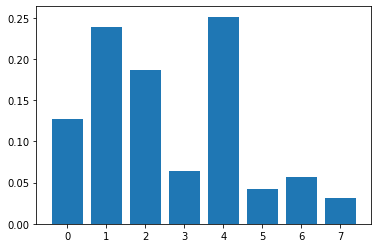

In [ ]:
plt.bar(range(len(classi.feature_importances_)), classi.feature_importances_)
plt.show()

the top 5 feature are 0,1,2,3 and 4

In [ ]:
# bagging classifier
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(x_train, y_train)
test_pred1 = bgcl.predict(x_test)
bgcl_score=bgcl.score(x_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))



The Bagging classifier model accuracy is 0.99835
The confusion matrix of Bagging classifier model is
[[19960     1]
 [   37     2]]


In [ ]:
from  sklearn.metrics import roc_auc_score, roc_curve 


In [ ]:
predict_bag=bgcl.predict(x_test)

In [ ]:
bgcl

BaggingClassifier(max_samples=0.7)

In [ ]:
from sklearn.metrics._plot.roc_curve import roc_curve
lov,ric,thresl= roc_curve(y_test,predict_bag[:])

In [ ]:
auc_score_bgcl = roc_auc_score(y_test, predict_bag[:])
print(auc_score_bgcl)

0.6025140048736061


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix=confusion_matrix(y_test,test_pred)
print(matrix)

[[19960     1]
 [   37     2]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(y_test,test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19961
           1       0.67      0.05      0.10        39

    accuracy                           1.00     20000
   macro avg       0.83      0.53      0.55     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
cool=confusion_matrix(y_test,test_pred1)
print(cool)

[[19959     2]
 [   31     8]]


In [ ]:
report=classification_report(y_test,test_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19961
           1       0.80      0.21      0.33        39

    accuracy                           1.00     20000
   macro avg       0.90      0.60      0.66     20000
weighted avg       1.00      1.00      1.00     20000

